# Import Packages

In [232]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats

# Loading Dataset

In [233]:
file_path = r'C:\Users\admin\Desktop\crops_recommendation.csv'
df = pd.read_csv(file_path)
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label,Growth Characteristics,"Use (Food, Feed, Fiber)",Type,Water Requirements,Harvest Method
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,Grass,Food,Cereals,Drought,By Hand Or Machine
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,Grass,Food,Cereals,Drought,By Hand Or Machine
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,Grass,Food,Cereals,Drought,By Hand Or Machine
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,Grass,Food,Cereals,Drought,By Hand Or Machine
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,Grass,Food,Cereals,Drought,By Hand Or Machine


# EDA And Data Visualization

In [234]:
df.shape
print("======================Column names:===================\n", df.columns)
print("===============Data types:==========================\n", df.dtypes)
print("\n==============Summary statistics=====================:")
print(df.describe())
print("\n=========Missing values:=====================")
print(df.isnull().sum().sum())
print("\n====std=======")
print(df.std(numeric_only=True))
print("\n====unique values=======")
df.nunique()

======================Column names:===================
 Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'Growth Characteristics', 'Use (Food, Feed, Fiber)', 'Type',
       'Water Requirements', 'Harvest Method'],
      dtype='object')
===============Data types:==========================
 N                            int64
P                            int64
K                            int64
temperature                float64
humidity                   float64
ph                         float64
rainfall                   float64
label                       object
Growth Characteristics      object
Use (Food, Feed, Fiber)     object
Type                        object
Water Requirements          object
Harvest Method              object
dtype: object

==============Summary statistics=====================:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mea

N                           137
P                           117
K                            73
temperature                2200
humidity                   2200
ph                         2200
rainfall                   2200
label                        22
Growth Characteristics        5
Use (Food, Feed, Fiber)       3
Type                          4
Water Requirements            5
Harvest Method                8
dtype: int64

In [235]:
print("Average Nitrogen Ratio: {0:.2f}".format(df['N'].mean()))
print("Average Phosphorous Ratio: {0:.2f}".format(df['P'].mean()))
print("Average Potassium Ratio: {0:.2f}".format(df['K'].mean()))
print("Average Temperature (C): {0:.2f}".format(df['temperature'].mean()))
print("Average Humidity: {0:.2f}".format(df['humidity'].mean()))
print("Average pH value: {0:.2f}".format(df['ph'].mean()))
print("Average Rainfall: {0:.2f}".format(df['rainfall'].mean()))

Average Nitrogen Ratio: 50.55
Average Phosphorous Ratio: 53.36
Average Potassium Ratio: 48.15
Average Temperature (C): 25.62
Average Humidity: 71.48
Average pH value: 6.47
Average Rainfall: 103.46


In [236]:

label_encoder = LabelEncoder()
d['label_encoded'] = label_encoder.fit_transform(df['label'])
df2 = numeric_columns.groupby('label_encoded').mean()
styled_df = df2.style.background_gradient(cmap='coolwarm')
styled_df


,N,P,K,temperature,humidity,ph,rainfall
label_encoded,,,,,,,
0,20.800000,134.220000,199.890000,22.630942,92.333383,5.929663,112.654779
1,100.230000,82.010000,50.050000,27.376798,80.358123,5.983893,104.626980
2,40.020000,67.470000,19.240000,29.973340,65.118426,7.133952,67.884151
3,40.090000,67.790000,79.920000,18.872847,16.860439,7.336957,80.058977
4,21.980000,16.930000,30.590000,27.409892,94.844272,5.976562,175.686646
5,101.200000,28.740000,29.940000,25.540477,58.869846,6.790308,158.066295
6,117.770000,46.240000,19.560000,23.988958,79.843474,6.912675,80.398043
7,23.180000,132.530000,200.110000,23.849575,81.875228,6.025937,69.611829
8,78.400000,46.860000,39.990000,24.958376,79.639864,6.732778,174.792798


# Correlation Matrix

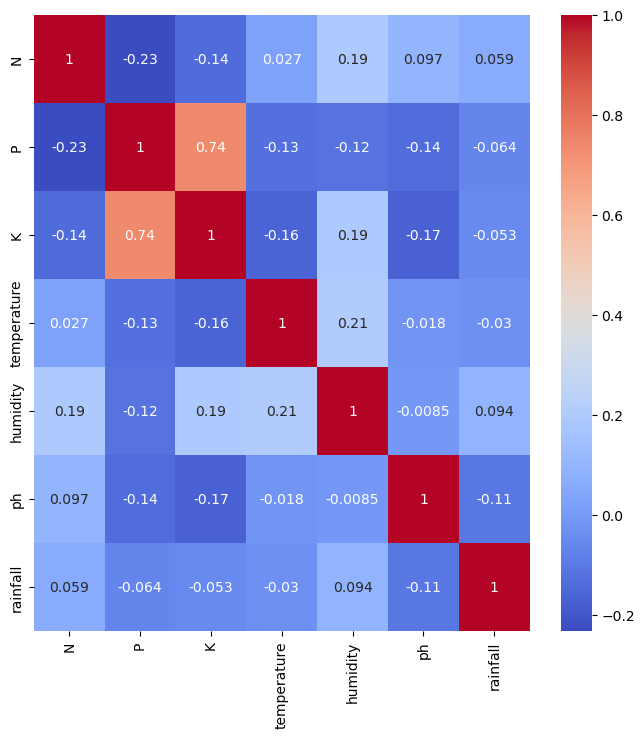

In [237]:
corr = df.corr(numeric_only=True) 
plt.figure(figsize=(8,8)) 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.show()

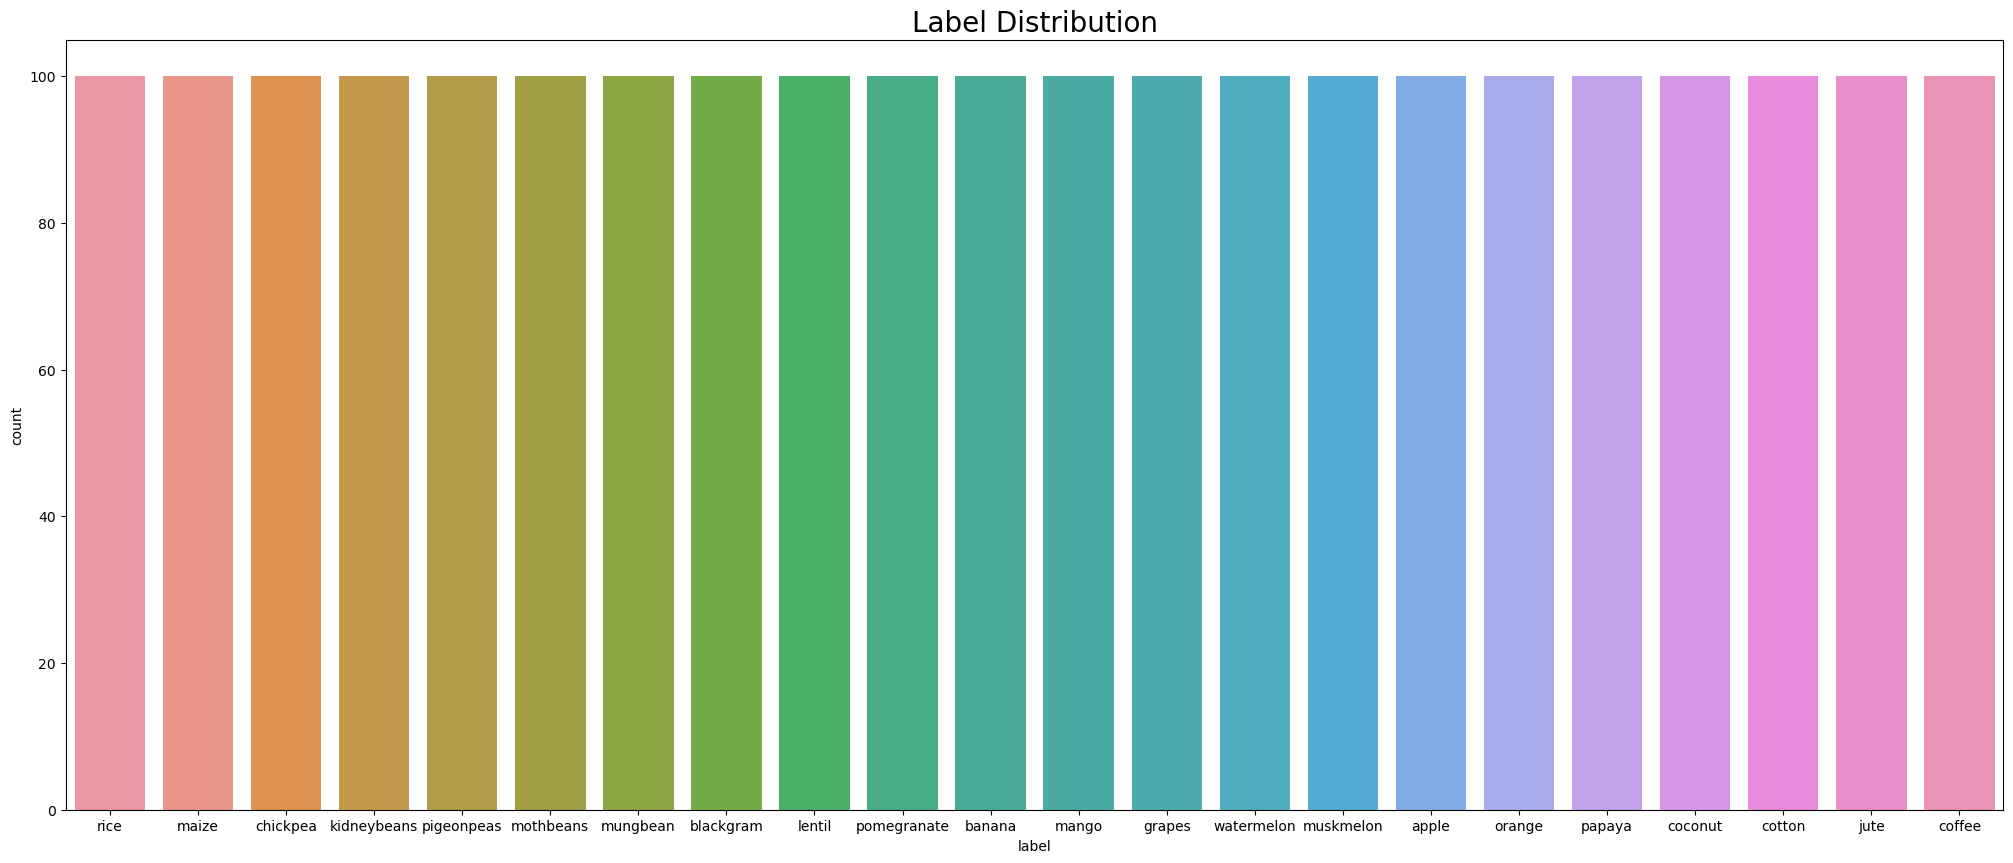

In [238]:
plt.figure(figsize=(25, 10))
sns.countplot(x='label', data=df)
plt.title('Label Distribution', fontsize=20)  
plt.show()

# Pie Chart

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
df['label'].value_counts().plot(kind='pie', autopct="%.1f%%")
plt.title('Label Distribution')
plt.ylabel('')  
plt.show()


NameError: name 'df' is not defined

<Figure size 1000x1000 with 0 Axes>

# Histogram

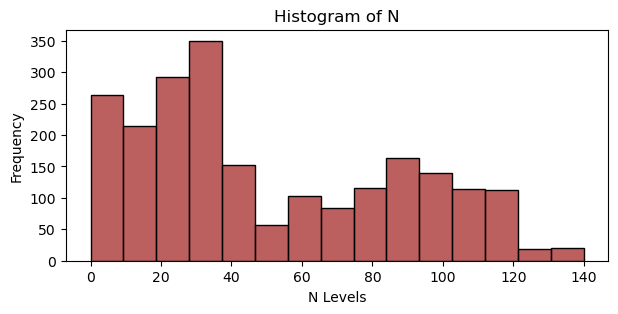

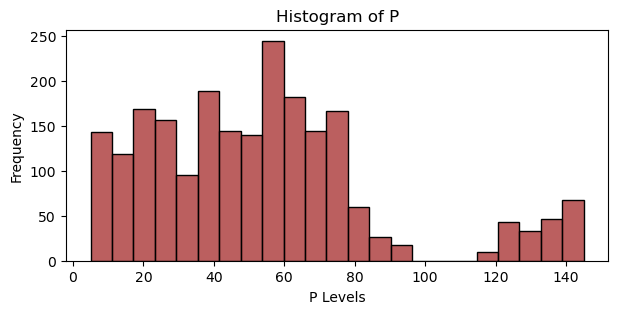

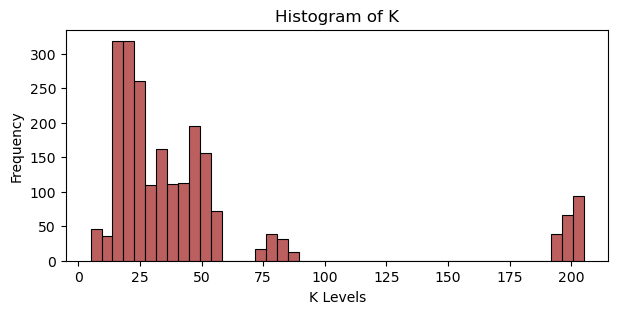

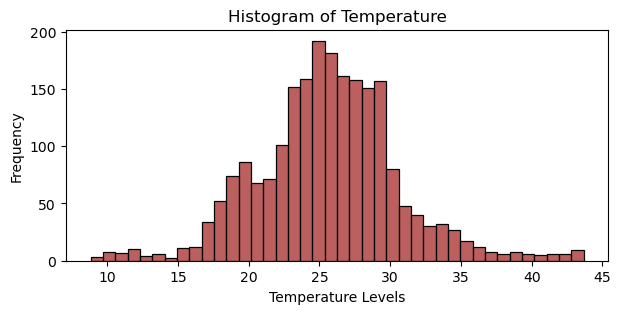

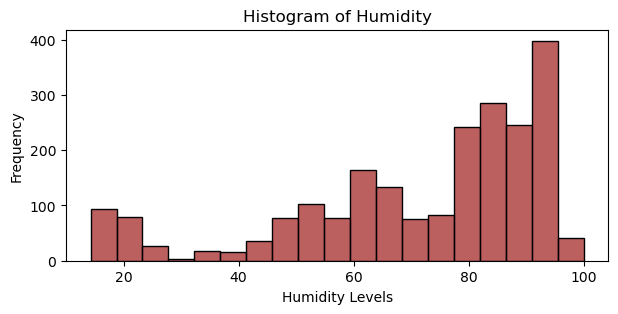

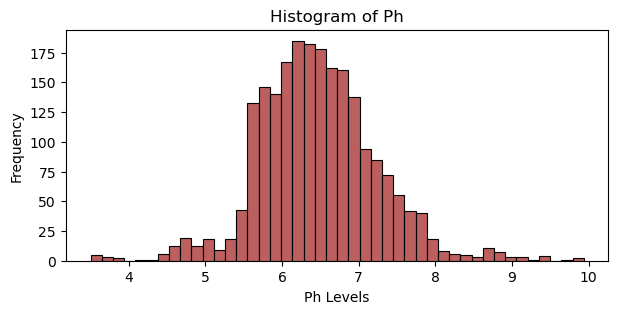

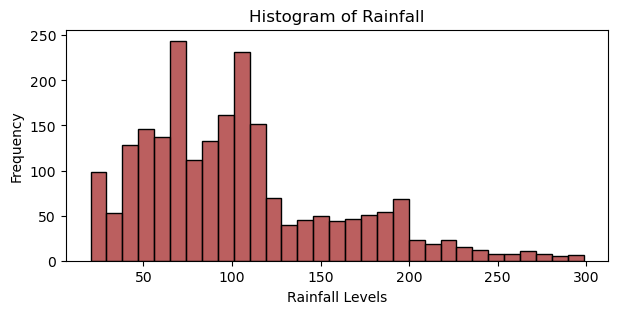

In [240]:
columns_to_plot = ['N', 'P', 'K', 'temperature', 'humidity', 'ph','rainfall']
for column in columns_to_plot:
    plt.figure(figsize=(7, 3))  
    sns.histplot(df[column], color='brown')
    plt.title(f'Histogram of {column.capitalize()}')
    plt.xlabel(f'{column.capitalize()} Levels')
    plt.ylabel('Frequency')
    plt.show()


# KDE

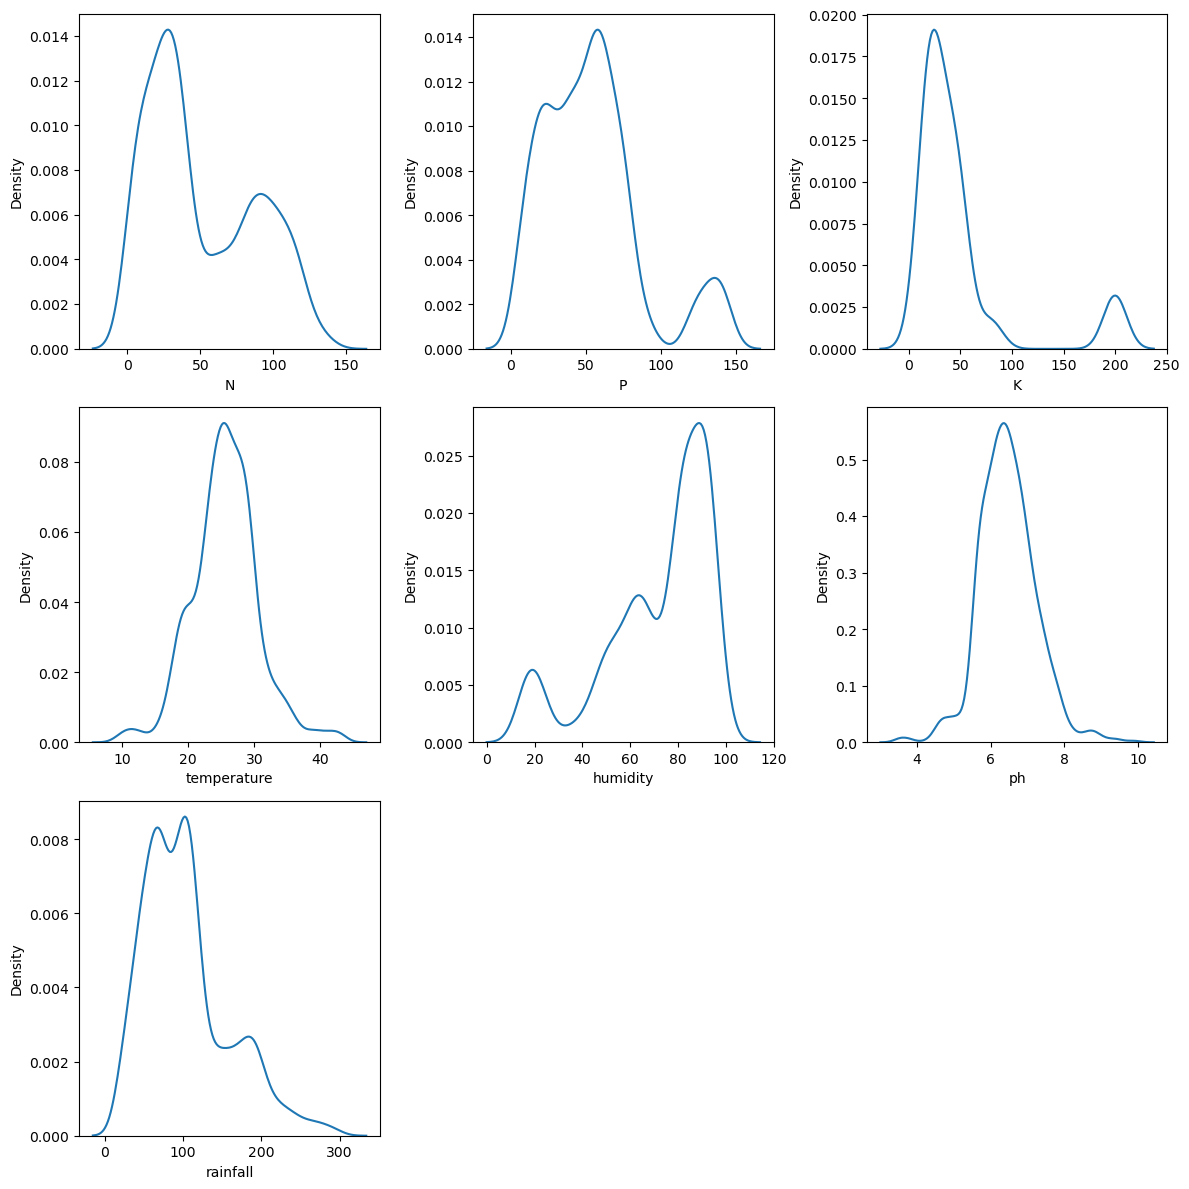

In [241]:

plt.figure(figsize=(12,12))
columns_to_plot = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
i = 1
for col in columns_to_plot:
    plt.subplot(3,3,i)
    sns.kdeplot(df[col])
    i += 1
plt.tight_layout()
plt.show()

# Outliers Detection


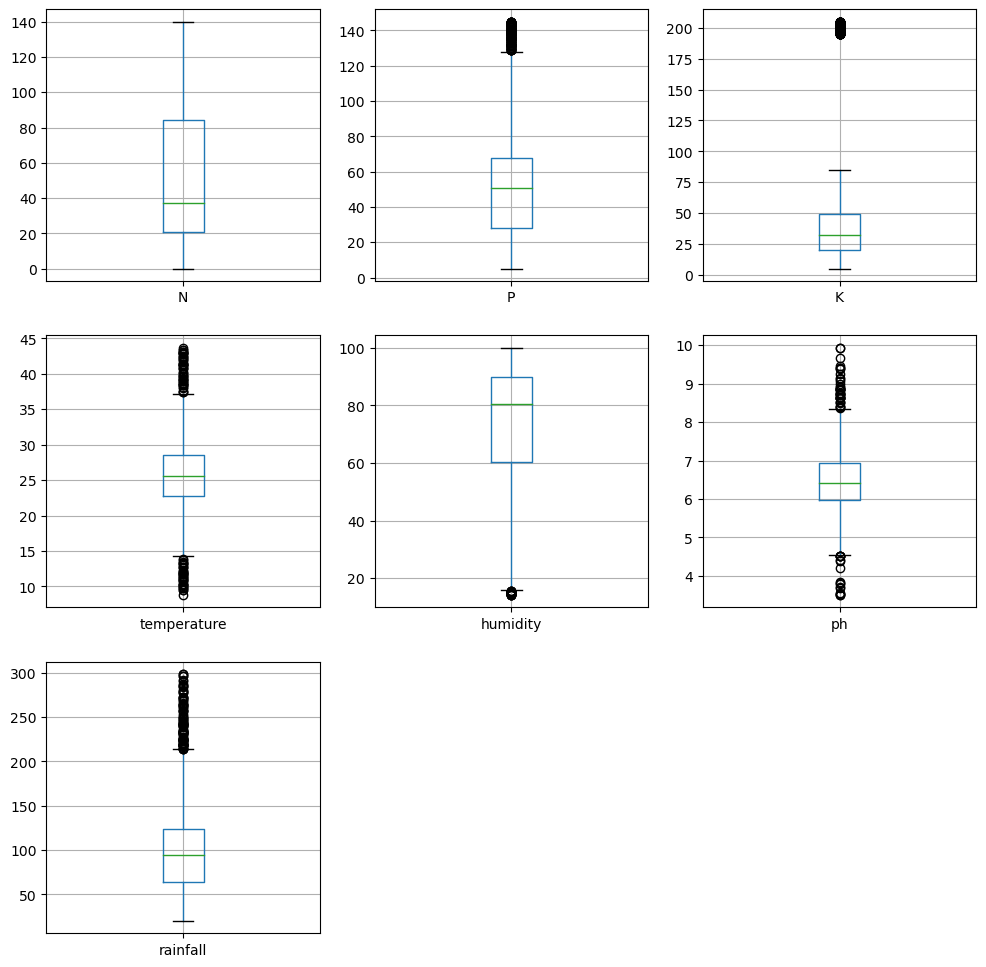

In [242]:
plt.figure(figsize=(12,12))

columns_to_plot = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
i = 1
for col in columns_to_plot:

    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

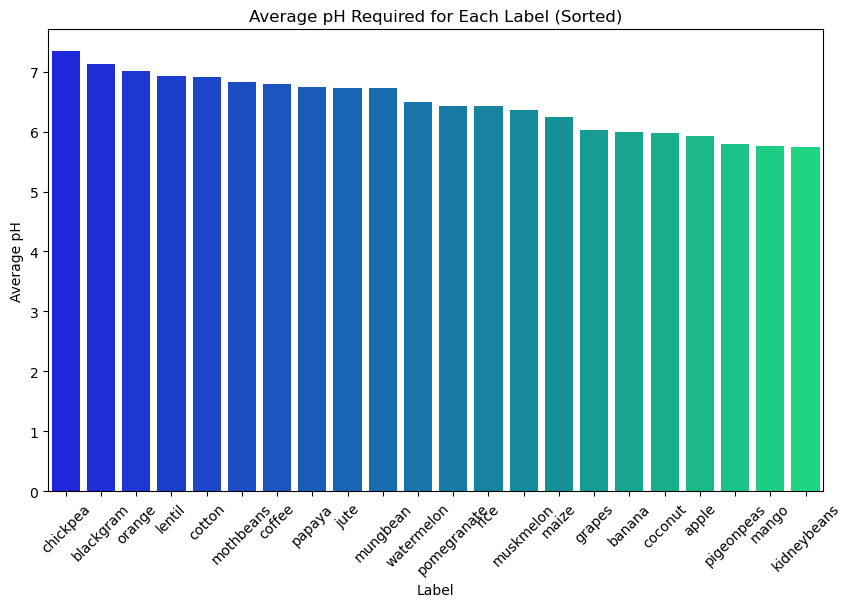

In [243]:
mean_ph_by_label = df.groupby('label')['ph'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_ph_by_label.index, y=mean_ph_by_label.values, palette='winter')
plt.title('Average pH Required for Each Label (Sorted)')
plt.xlabel('Label')
plt.ylabel('Average pH')
plt.xticks(rotation=45)
plt.show()


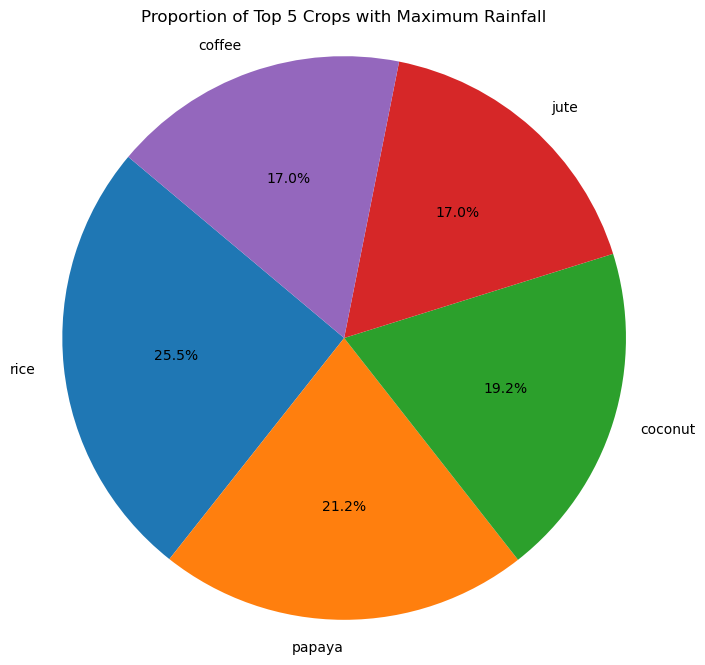

In [244]:
top5_max_rainfall_crops = df.groupby('label')['rainfall'].max().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top5_max_rainfall_crops, labels=top5_max_rainfall_crops.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Top 5 Crops with Maximum Rainfall')
plt.axis('equal')
plt.show()


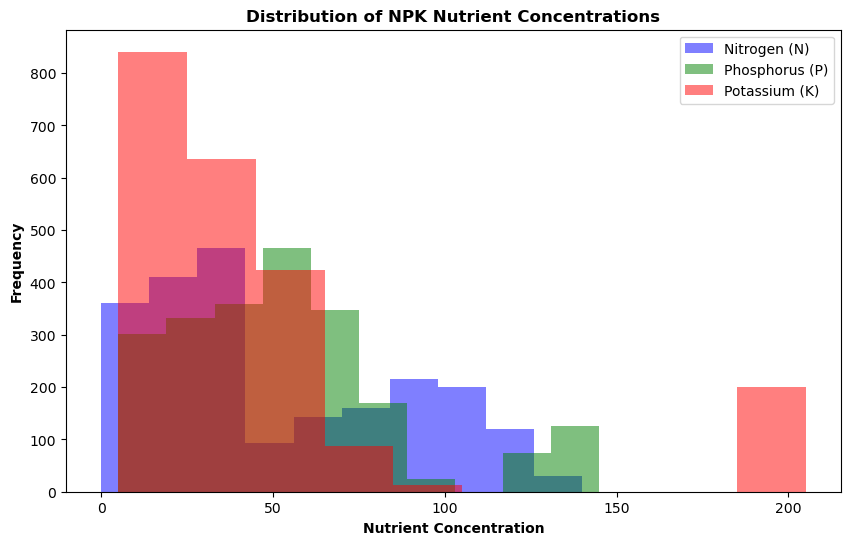

In [245]:
plt.figure(figsize=(10, 6))

plt.hist(df['N'], bins=10, alpha=0.5, color='b', label='Nitrogen (N)')
plt.hist(df['P'], bins=10, alpha=0.5, color='g', label='Phosphorus (P)')
plt.hist(df['K'], bins=10, alpha=0.5, color='r', label='Potassium (K)')
plt.xlabel('Nutrient Concentration', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of NPK Nutrient Concentrations', fontweight='bold')

plt.legend()

plt.show()


# Line Graph

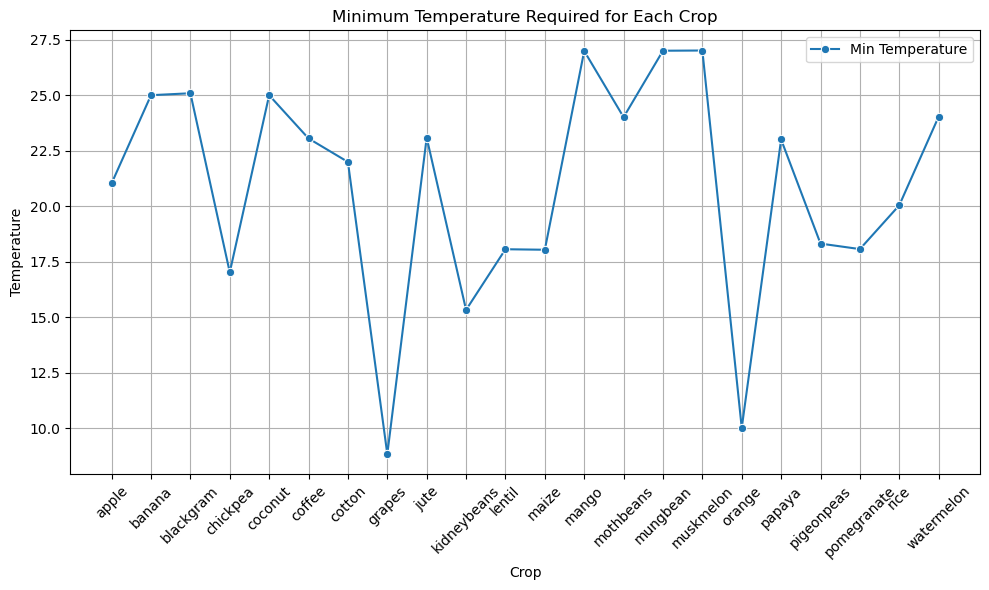

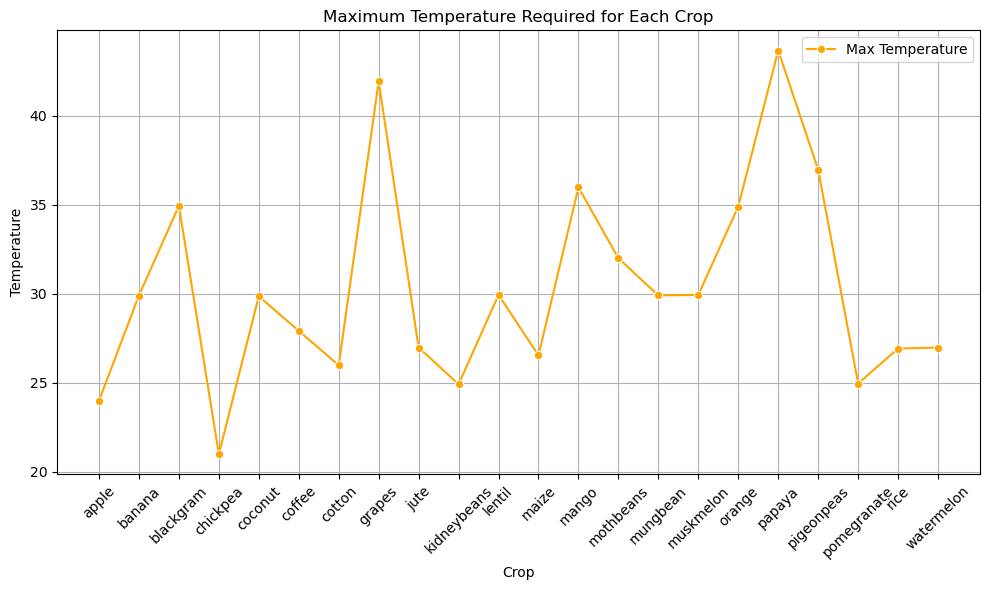

In [246]:
min_max_temp = df.groupby('label').agg({'temperature': ['min', 'max']})
min_max_temp.columns = ['min_temp', 'max_temp']
min_max_temp = min_max_temp.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=min_max_temp, x='label', y='min_temp', marker='o', label='Min Temperature')

plt.title('Minimum Temperature Required for Each Crop')
plt.xlabel('Crop')
plt.ylabel('Temperature')
plt.xticks(rotation=45)  
plt.grid(True)  
plt.tight_layout()  
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=min_max_temp, x='label', y='max_temp', marker='o', label='Max Temperature', color='orange')

plt.title('Maximum Temperature Required for Each Crop')
plt.xlabel('Crop')
plt.ylabel('Temperature')
plt.xticks(rotation=45)  
plt.grid(True) 
plt.tight_layout()  
plt.show()


In [247]:
d=df.drop(['label','Growth Characteristics','Use (Food, Feed, Fiber)','Type','Water Requirements','Harvest Method'],axis = 'columns')
d

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [248]:
zscores = stats.zscore(d)
outliers = (zscores > 3).all(axis=1)
zscore_data = d.drop(d[outliers].index)
print("DataFrame after removing outliers:")
print(zscore_data.head())

DataFrame after removing outliers:
    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340


In [249]:
df.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'Growth Characteristics', 'Use (Food, Feed, Fiber)', 'Type',
       'Water Requirements', 'Harvest Method'],
      dtype='object')

In [250]:
categorical_data = df[['label','Growth Characteristics','Use (Food, Feed, Fiber)','Type','Water Requirements','Harvest Method']]  

df = pd.concat([categorical_data, zscore_data], axis=1)

print("DataFrame with both numerical and categorical columns after removing outliers:")
print(df.head())

DataFrame with both numerical and categorical columns after removing outliers:
  label Growth Characteristics Use (Food, Feed, Fiber)     Type  \
0  rice                  Grass                    Food  Cereals   
1  rice                  Grass                    Food  Cereals   
2  rice                  Grass                    Food  Cereals   
3  rice                  Grass                    Food  Cereals   
4  rice                  Grass                    Food  Cereals   

  Water Requirements      Harvest Method   N   P   K  temperature   humidity  \
0            Drought  By Hand Or Machine  90  42  43    20.879744  82.002744   
1            Drought  By Hand Or Machine  85  58  41    21.770462  80.319644   
2            Drought  By Hand Or Machine  60  55  44    23.004459  82.320763   
3            Drought  By Hand Or Machine  74  35  40    26.491096  80.158363   
4            Drought  By Hand Or Machine  78  42  42    20.130175  81.604873   

         ph    rainfall  
0  6.502985

# One-Hot Encoder

In [251]:
categorical_cols = ['label']
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['label'])
X = df[numerical_cols]
y = encoded_labels 


# splitting And Scailing

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Feature Engineering

In [253]:
selector = SelectKBest(score_func=f_classif, k=4)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
X_test_selected

array([[ 1.4613404 , -1.19256918,  0.03115739,  0.72476508],
       [ 1.08334538, -1.25290297, -0.04706944,  0.62576809],
       [-0.99562722,  2.03528814,  3.02333359,  0.54654732],
       ...,
       [ 1.78533613,  0.07444023, -0.65332736,  0.24384664],
       [-0.64463185,  0.31577536, -0.53598712, -0.13469712],
       [-0.53663327,  2.30679015,  2.92555005,  0.9529706 ]])

# Training Models And Accuracy

# SVM MODEL

In [254]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_selected, y_train)
y_pred = svm_model.predict(X_test_selected)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {svm_accuracy * 100:.2f}%')


Accuracy: 90.23%


# LOGISTIC REGRESSION

In [255]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_selected, y_train)
y_pred_log = logistic_model.predict(X_test_selected)
logistic_accuracy = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {logistic_accuracy * 100:.2f}%')


Accuracy: 87.95%


# Decision Tree

In [256]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_selected, y_train)
y_pred_dt = decision_tree_model.predict(X_test_selected)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print(f'Accuracy: {dt_accuracy * 100:.2f}%')


Accuracy: 92.50%


# K-Nearest Neighbour

In [257]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train_selected, y_train)

y_pred_knn = knn_model.predict(X_test_selected)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')

KNN Accuracy: 91.59%


# GussianNB

In [258]:
nb_model = GaussianNB()
nb_model.fit(X_train_selected, y_train)
y_pred_nb = nb_model.predict(X_test_selected)

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f' GussianNB Accuracy: {nb_accuracy * 100:.2f}%')

 GussianNB Accuracy: 92.73%


# Random Forest

In [259]:

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_selected, y_train)
X_test_selected = selector.transform(X_test_scaled)
y_pred_rf = random_forest_model.predict(X_test_selected)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')


Random Forest Accuracy: 94.32%


# RANDOM FOREST GIVES HIGHEST ACCURACY

# Comparison Accuracies Graph 

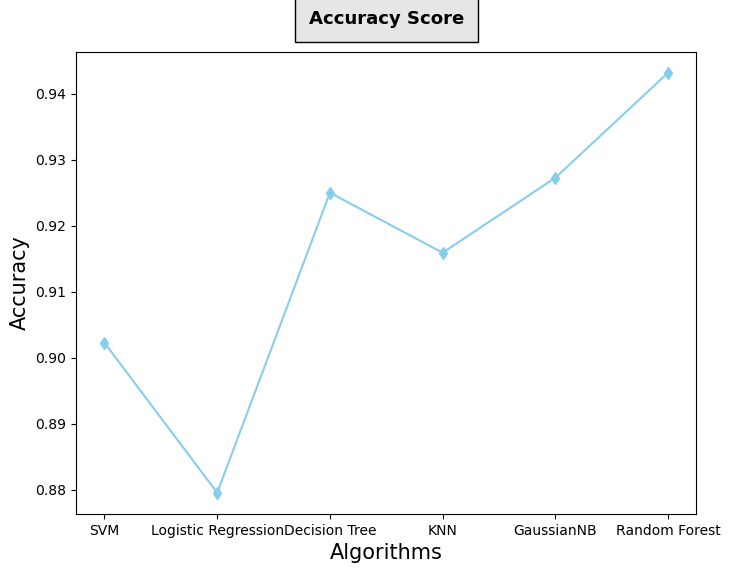

In [260]:
accuracy_scores = [svm_accuracy, logistic_accuracy, dt_accuracy, knn_accuracy, nb_accuracy, rf_accuracy]

models = ['SVM', 'Logistic Regression', 'Decision Tree', 'KNN', 'GaussianNB', 'Random Forest']

plt.figure(figsize=(8, 6))

plt.title('Accuracy Score', fontweight='bold', fontsize=13, bbox={'facecolor': '0.9', 'pad': 10}, pad=20)
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.plot(models, accuracy_scores, color='skyblue', marker="d")

plt.show()


(0.0, 1.0)

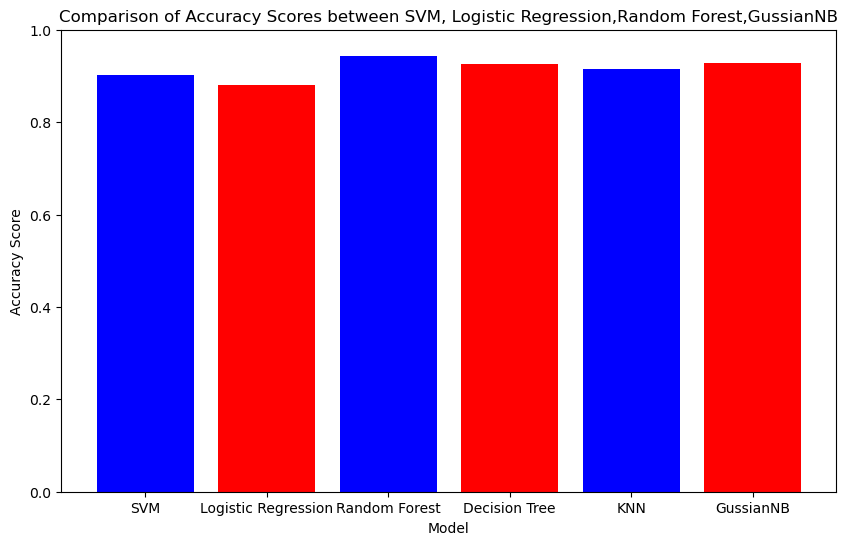

In [261]:

accuracy_scores = [svm_accuracy, logistic_accuracy,rf_accuracy,dt_accuracy,knn_accuracy,nb_accuracy]

models = ['SVM', 'Logistic Regression','Random Forest','Decision Tree','KNN','GussianNB']
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue','red'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores between SVM, Logistic Regression,Random Forest,GussianNB')
plt.ylim(0, 1) 

# Cross Validation Accuracy

# Cross-Validation Accuracy Of SVM

In [262]:
scores = cross_val_score(svm_model, X_train_selected, y_train, cv=5)  
print(f'Cross-Validation Accuracy Of SVm: {np.mean(scores)* 100:.2f}%')

Cross-Validation Accuracy Of SVm: 90.51%


# Cross-Validation Of Logistic Regression

In [263]:
scores = cross_val_score(logistic_model, X_train_selected, y_train, cv=5)   
print(f'Cross-Validation Accuracy Of Logistic Regression: {np.mean(scores)* 100:.2f}%')

Cross-Validation Accuracy Of Logistic Regression: 89.20%


# Cross-Validation Accuracy Of Decision Tree

In [264]:
scores = cross_val_score(decision_tree_model, X_train_selected, y_train, cv=5)  
print(f'Cross-Validation Accuracy Of Decision Tree: {np.mean(scores)* 100:.2f}%')

Cross-Validation Accuracy Of Decision Tree: 78.82%


# Cross Validation Accuracy Of KNN

In [265]:
scores = cross_val_score(knn_model, X_train_selected, y_train, cv=5)  
print(f'Cross-Validation Accuracy Of KNN: {np.mean(scores)* 100:.2f}%')


Cross-Validation Accuracy Of KNN: 90.11%


# Crosss-Validation Accuracy Of GussianNB

In [266]:
scores = cross_val_score(nb_model, X_train_selected, y_train, cv=5)  
print(f'Cross-Validation Accuracy Of GussianNB: {np.mean(scores)* 100:.2f}%')


Cross-Validation Accuracy Of GussianNB: 93.30%


# Cross-Validation Accuracy Of Random Forest

In [267]:
scores = cross_val_score(random_forest_model, X_train_selected, y_train, cv=5)  
print(f'Cross-Validation Accuracy Of Random Forest: {np.mean(scores)* 100:.2f}%')


Cross-Validation Accuracy Of Random Forest: 93.81%


# Cross-Validation Accuracies Graph

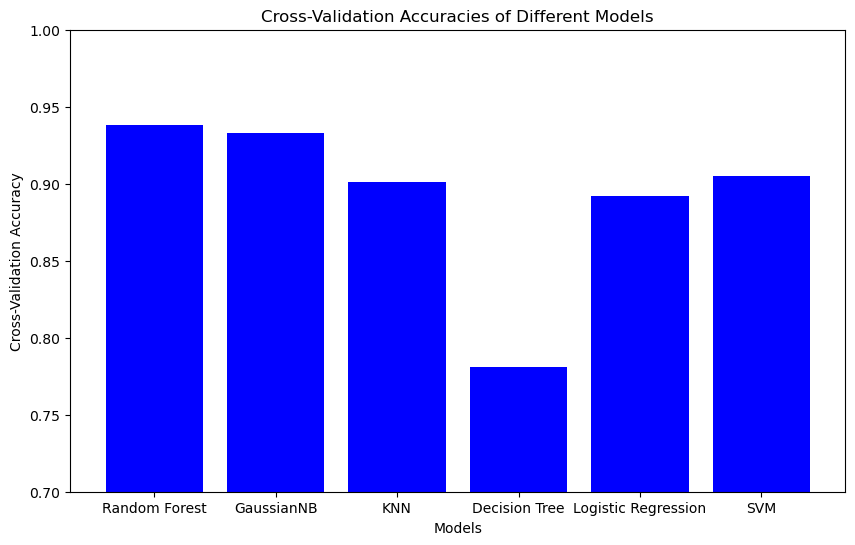

In [268]:
models = ['Random Forest', 'GaussianNB', 'KNN', 'Decision Tree', 'Logistic Regression', 'SVM']
accuracies = [0.9380681818181819, 0.9329545454545454, 0.9011363636363636, 0.7809699296753891, 0.8920454545454547, 0.9051136363636363]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracies of Different Models')
plt.ylim(0.7, 1)  
plt.show()

# Confusion Matrix Of Each Model

# CONFUSION MATRIX FOR SVM

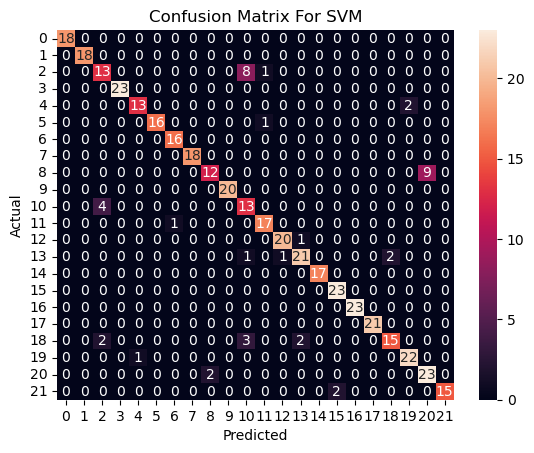

In [269]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix For SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# CONFUSION MATRIX FOR LOGISTIC REGRESSION

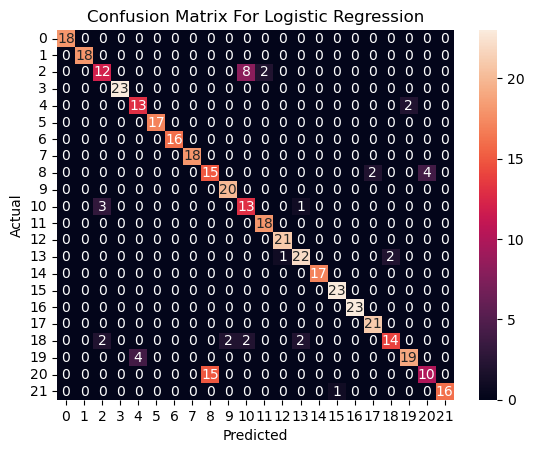

In [270]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix For Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# CONFUSION MATRIX FOR Decision Tree

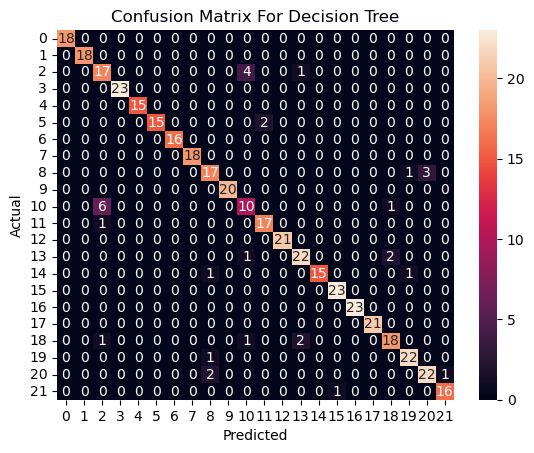

In [271]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix For Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix For KNN

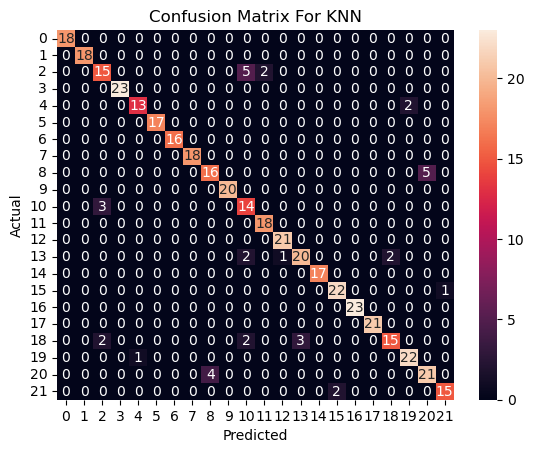

In [272]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix For KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix For GussianNB

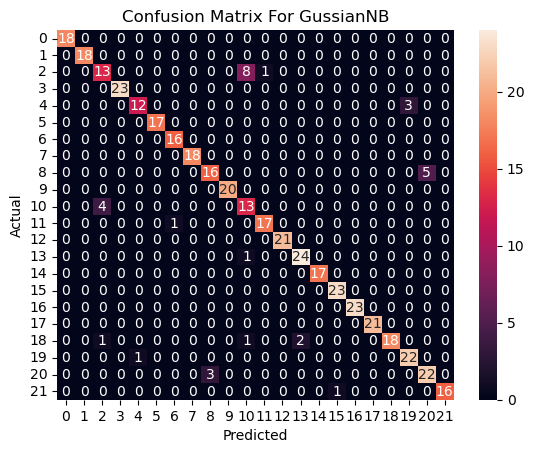

In [273]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix For GussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix For Random Forest

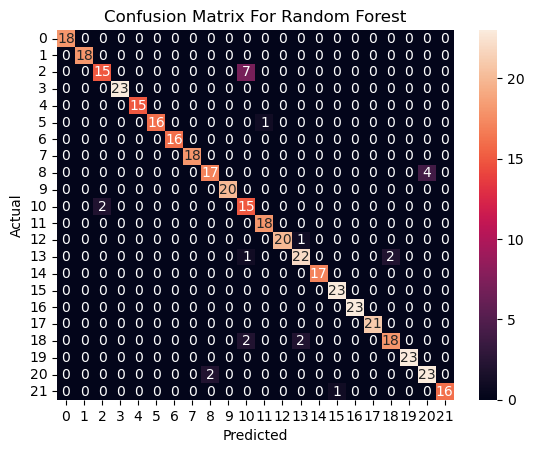

In [274]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix For Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report For Each Model

# Classification Report For SVM

In [275]:
print("================Classification Report:===================")
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report for SVM Model:")
print(report)


================Classification Report:===================
Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.68      0.59      0.63        22
           3       1.00      1.00      1.00        23
           4       0.93      0.87      0.90        15
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        16
           7       1.00      1.00      1.00        18
           8       0.86      0.57      0.69        21
           9       1.00      1.00      1.00        20
          10       0.52      0.76      0.62        17
          11       0.89      0.94      0.92        18
          12       0.95      0.95      0.95        21
          13       0.88      0.84      0.86        25
          14       1.00      1.00      1.00        17
          15       0.92      1.00      0

# Classification Report For Logistic Regression

In [276]:
print("=================Classification Report:=====================")
report = classification_report(y_test, y_pred_log)

print("Classification Report for Logistic Regression Model:")
print(report)


=================Classification Report:=====================
Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.71      0.55      0.62        22
           3       1.00      1.00      1.00        23
           4       0.76      0.87      0.81        15
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       0.50      0.71      0.59        21
           9       0.91      1.00      0.95        20
          10       0.57      0.76      0.65        17
          11       0.90      1.00      0.95        18
          12       0.95      1.00      0.98        21
          13       0.88      0.88      0.88        25
          14       1.00      1.00      1.00        17
          15       0.

# Classification Report For Decision Tree

In [277]:
print("=================Classification Report:=====================")

from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_dt)

print("Classification Report for Decision Tree Model:")
print(report)

=================Classification Report:=====================
Classification Report for Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.68      0.77      0.72        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      0.88      0.94        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       0.81      0.81      0.81        21
           9       1.00      1.00      1.00        20
          10       0.62      0.59      0.61        17
          11       0.89      0.94      0.92        18
          12       1.00      1.00      1.00        21
          13       0.88      0.88      0.88        25
          14       1.00      0.88      0.94        17
          15       0.96    

# Classification Report For KNN

In [278]:
print("=================Classification Report:=====================")

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_knn)
print("Classification Report for KNN Model:")
print(report)

=================Classification Report:=====================
Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.75      0.68      0.71        22
           3       1.00      1.00      1.00        23
           4       0.93      0.87      0.90        15
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       0.80      0.76      0.78        21
           9       1.00      1.00      1.00        20
          10       0.61      0.82      0.70        17
          11       0.90      1.00      0.95        18
          12       0.95      1.00      0.98        21
          13       0.87      0.80      0.83        25
          14       1.00      1.00      1.00        17
          15       0.92      0.96    

# Classification Report For GussianNB

In [279]:
print("=================Classification Report:=====================")

report = classification_report(y_test, y_pred_nb)
print("Classification Report for GussainNB Model:")
print(report)

=================Classification Report:=====================
Classification Report for GussainNB Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.72      0.59      0.65        22
           3       1.00      1.00      1.00        23
           4       0.92      0.80      0.86        15
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        16
           7       1.00      1.00      1.00        18
           8       0.84      0.76      0.80        21
           9       1.00      1.00      1.00        20
          10       0.57      0.76      0.65        17
          11       0.94      0.94      0.94        18
          12       1.00      1.00      1.00        21
          13       0.92      0.96      0.94        25
          14       1.00      1.00      1.00        17
          15       0.96      1.

# Classification Report For Random Forest

In [280]:
print("=================Classification Report:=====================")

report = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest Model:")
print(report)


=================Classification Report:=====================
Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        18
           2       0.88      0.68      0.77        22
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        15
           5       1.00      0.94      0.97        17
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        18
           8       0.89      0.81      0.85        21
           9       1.00      1.00      1.00        20
          10       0.60      0.88      0.71        17
          11       0.95      1.00      0.97        18
          12       1.00      0.95      0.98        21
          13       0.88      0.88      0.88        25
          14       1.00      1.00      1.00        17
          15       0.96    

# Taking User Input

In [281]:
N =float(input("Enter Nitrogen: "))
P=float(input("Enter Phosphorous: "))
K= float(input("Enter Potassium : "))
temperature = float(input("Enter temperature: "))
humidity = float(input("Enter humidity: "))
ph = float(input("Enter ph: "))
rainfall = float(input("Enter rainfall: "))


Enter Nitrogen: 19
Enter Phosphorous: 21
Enter Potassium : 34
Enter temperature: 30.01592643
Enter humidity: 53.19212381
Enter ph: 5.074272692
Enter rainfall: 97.72843182


In [282]:
user_input = pd.DataFrame({'N': [N],
                           'P': [P],
                           'K': [K],
                           'temperature': [temperature],
                           'humidity': [humidity],
                           'ph': [ph],
                           'rainfall': [rainfall]})

In [283]:
user_input_selected = selector.transform(scaler.transform(user_input))

# Prediction By Each Model

# Predicting Crop By SVM

In [284]:
user_pred = svm_model.predict(user_input_selected)

predicted_label = label_encoder.inverse_transform(user_pred)[0]

print("Acoording To SVM Which Crop Will Grow?:", predicted_label)

Acoording To SVM Which Crop Will Grow?: mango


# Predicting Crop By Logistic Regeression

In [285]:

user_pred = logistic_model.predict(user_input_selected)

predicted_label_lr = label_encoder.inverse_transform(user_pred)[0]
print("According To LOGISTIC REGRESSION Would The Crop Grow? :",predicted_label_lr)

According To LOGISTIC REGRESSION Would The Crop Grow? : mango


# Predicting Crop By KNN

In [286]:
user_pred_knn = knn_model.predict(user_input_selected)
predicted_label_knn = label_encoder.inverse_transform(user_pred_knn)[0]

print("According to K-Nearest Neighbors, Predicted Crop Growth Category:", predicted_label_knn)


According to K-Nearest Neighbors, Predicted Crop Growth Category: mango


# Predicting Crop By Decision Tree

In [287]:
user_pred_dt = decision_tree_model.predict(user_input_selected)
predicted_label_dt = label_encoder.inverse_transform(user_pred_dt.astype(int))[0]
print("According to Decision Tree, Predicted Crop Growth Category:", predicted_label_dt)
predicted_label_dt = user_pred[0]

print("According to Decision Tree, Predicted Crop Growth Category:", predicted_label_dt)



According to Decision Tree, Predicted Crop Growth Category: mango
According to Decision Tree, Predicted Crop Growth Category: 12


# Predicting Crop By GussianNB

In [288]:
user_pred_nb = nb_model.predict(user_input_selected)

predicted_label_nb = label_encoder.inverse_transform(user_pred_nb)[0]
print("According To GussianNB  Would The Crop Grow? :", predicted_label_nb)


According To GussianNB  Would The Crop Grow? : mango


# Predicting Proabability Of Crop By Random Forest

In [289]:
user_pred_prob = random_forest_model.predict_proba(user_input_selected)
crop_labels = label_encoder.classes_
crop_probabilities = dict(zip(crop_labels, user_pred_prob[0]))
sorted_crop_probabilities = sorted(crop_probabilities.items(), key=lambda x: x[1], reverse=True)

# Retrieve the top 3 predicted crops
top_3_crops = sorted_crop_probabilities[:3]

print("Top 3 predicted crops and their probabilities:")
for i, (crop, probability) in enumerate(top_3_crops):
    print(f"{i+1}. Crop: {crop}, Probability: {probability:.2f}")

# Retrieve additional information for the top predicted crop
top_crop, top_probability = top_3_crops[0]
crop_info = df[df['label'] == top_crop].iloc[0]
print("\nAdditional information for the most probable crop:")
print(f"- Crop Name: {top_crop}")
print(f"- Growth Characteristics: {crop_info['Growth Characteristics']}")
print(f"- Use: {crop_info['Use (Food, Feed, Fiber)']}")
print(f"- Type: {crop_info['Type']}")
print(f"- Water Requirements: {crop_info['Water Requirements']}")
print(f"- Harvest Method: {crop_info['Harvest Method']}")
print(f"- Probability: {top_probability:.2f}")

Top 3 predicted crops and their probabilities:
1. Crop: mango, Probability: 1.00
2. Crop: apple, Probability: 0.00
3. Crop: banana, Probability: 0.00

Additional information for the most probable crop:
- Crop Name: mango
- Growth Characteristics: Tree
- Use: Fiber
- Type: Fruit
- Water Requirements: Drought Tolerance
- Harvest Method: Hands
- Probability: 1.00


# Mean Squared Error For Each Model

In [290]:
mse = mean_squared_error(y_test, y_pred_log)

print("Mean Squared Error For Logistic Regression: ", mse)

Mean Squared Error For Logistic Regression:  13.777272727272727


In [291]:
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error For SVM:", mse)

Mean Squared Error For SVM: 9.218181818181819


In [292]:
mse = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error For Random Forest:", mse)

Mean Squared Error For Random Forest: 3.977272727272727


In [293]:
mse = mean_squared_error(y_test, y_pred_dt)

print("Mean Squared Error For Random Forest:", mse)

Mean Squared Error For Random Forest: 5.6068181818181815


In [294]:
mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error For Random Forest:", mse)

Mean Squared Error For Random Forest: 8.038636363636364


In [295]:
mse = mean_squared_error(y_test, y_pred_nb)
print("Mean Squared Error For GussianNB:", mse)

Mean Squared Error For GussianNB: 7.593181818181818


# MSE Comparision Graph

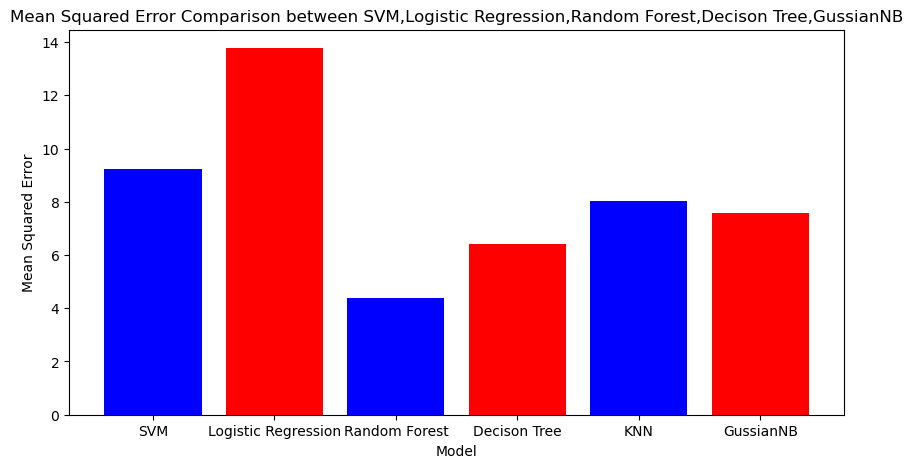

In [296]:
models = ['SVM', 'Logistic Regression','Random Forest','Decison Tree','KNN','GussianNB']
mse_values = [9.218181818181819, 13.777272727272727,4.377272727272727,6.406818181818182,8.038636363636364,7.593181818181818]

plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color=['blue', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison between SVM,Logistic Regression,Random Forest,Decison Tree,GussianNB')
plt.show()

# Feature Importance For Each Model

Text(0.5, 1.0, 'Feature Importance for Logistic Regression')

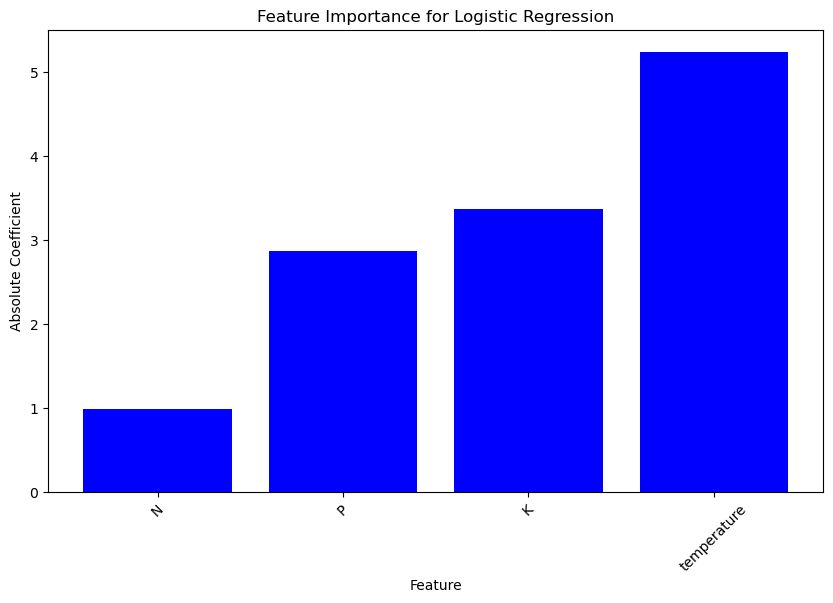

In [297]:

feature_names = ['N','P','K','temperature', 'humidity', 'ph','rainfall', 'label']
top_coefficients = logistic_model.coef_[0][-8:]
top_feature_indices = np.argsort(np.abs(top_coefficients))
top_feature_names = [feature_names[i] for i in top_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_coefficients)), np.abs(top_coefficients), color='blue', align='center')
plt.xticks(range(len(top_coefficients)), top_feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title('Feature Importance for Logistic Regression')

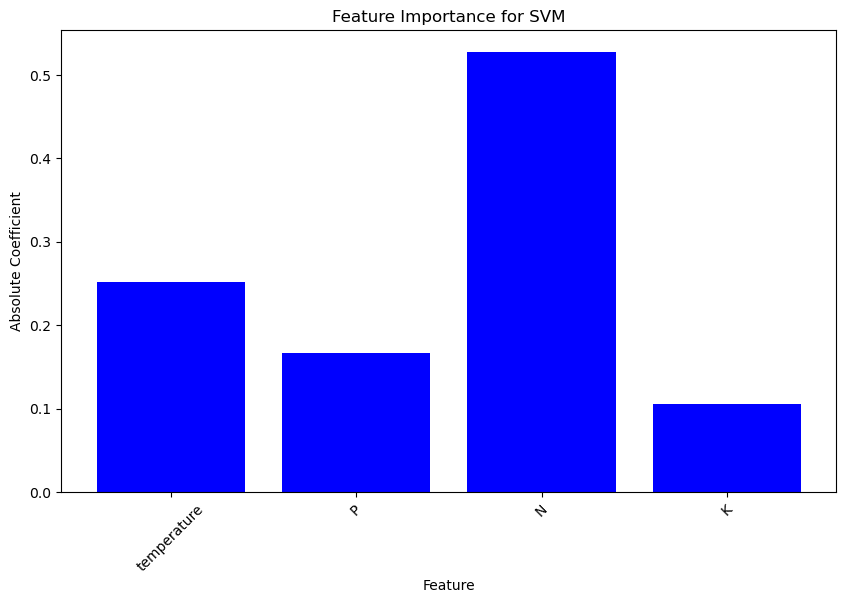

In [298]:

svm_coefficients = svm_model.coef_[0]
top_coefficients = svm_coefficients[:8]
top_feature_indices = np.argsort(np.abs(top_coefficients))
top_feature_names = [feature_names[i] for i in top_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_coefficients)), np.abs(top_coefficients), color='blue', align='center')
plt.xticks(range(len(top_coefficients)), top_feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title('Feature Importance for SVM')
plt.show()

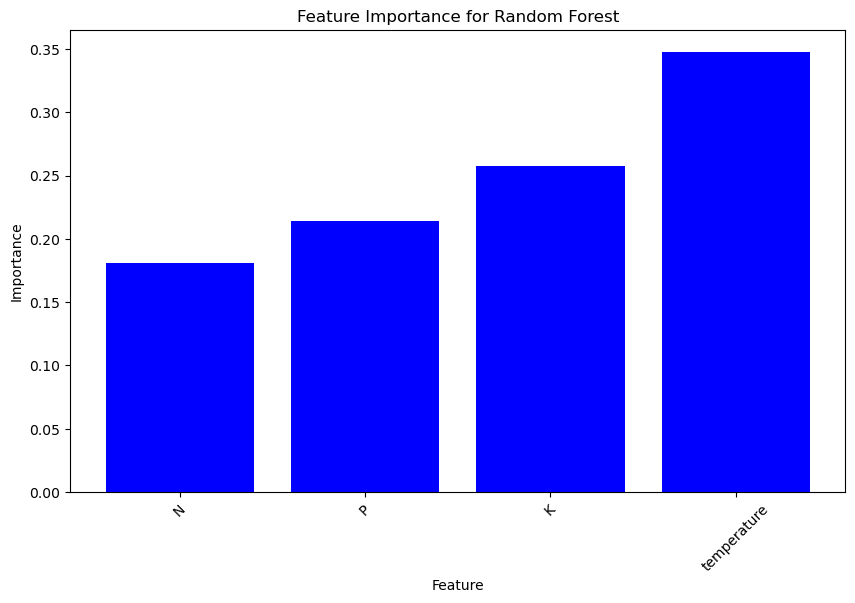

In [299]:
feature_names = ['N','P','K','temperature', 'humidity', 'ph','rainfall', 'label']
top_importances = random_forest_model.feature_importances_
top_feature_indices = np.argsort(top_importances)[-8:]  
top_feature_names = [feature_names[i] for i in top_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances[top_feature_indices], color='blue', align='center')
plt.xticks(range(len(top_importances)), top_feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest')
plt.show()


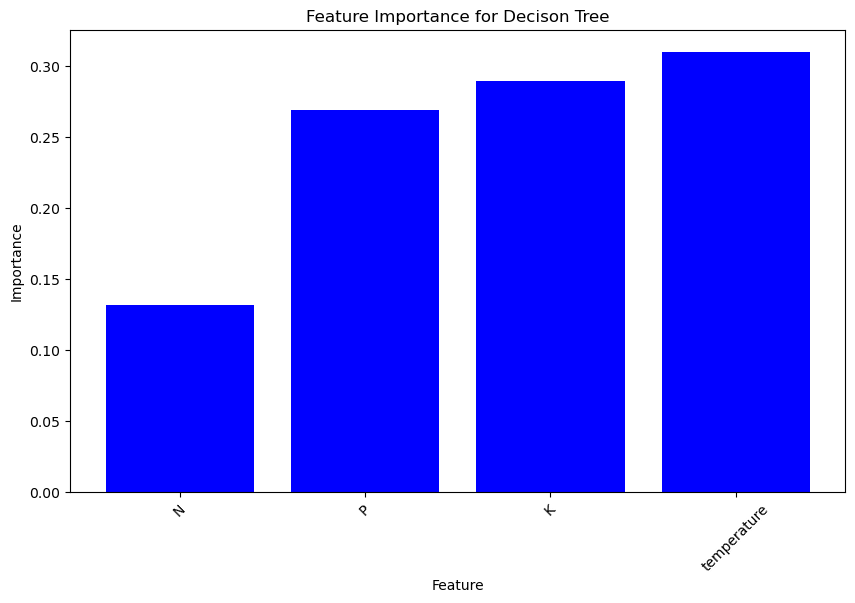

In [300]:
feature_names = ['N','P','K','temperature', 'humidity', 'ph','rainfall', 'label']
top_importances =decision_tree_model.feature_importances_
top_feature_indices = np.argsort(top_importances)[-8:]  
top_feature_names = [feature_names[i] for i in top_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_importances)), top_importances[top_feature_indices], color='blue', align='center')
plt.xticks(range(len(top_importances)), top_feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Decison Tree')
plt.show()

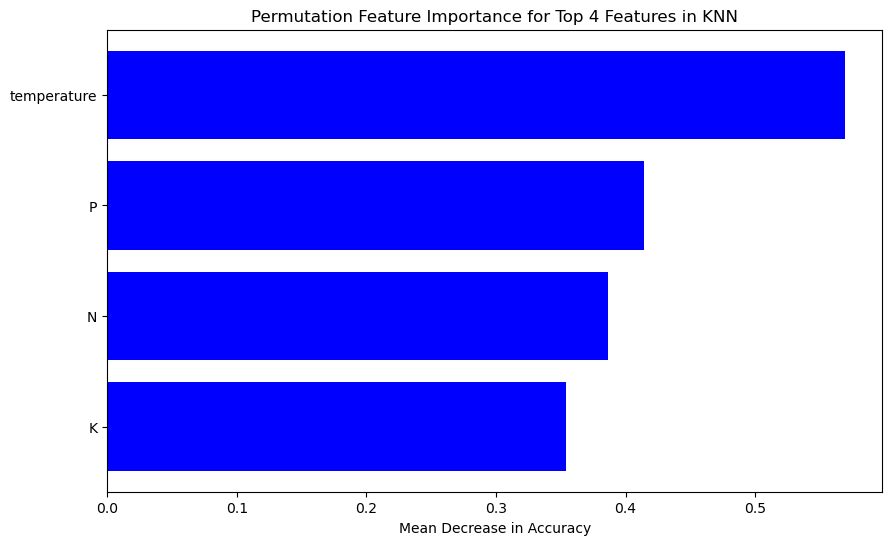

In [301]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn_model, X_test_selected, y_test, n_repeats=10, random_state=42)

feature_names = np.array(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

top_feature_indices = result.importances_mean.argsort()[-4:]
top_feature_names = feature_names[top_feature_indices]  # Corrected line

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), result.importances_mean[top_feature_indices], color='blue', align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Feature Importance for Top 4 Features in KNN')
plt.show()


# Distribution Graph Of Each Feature By Using GussianNB Model

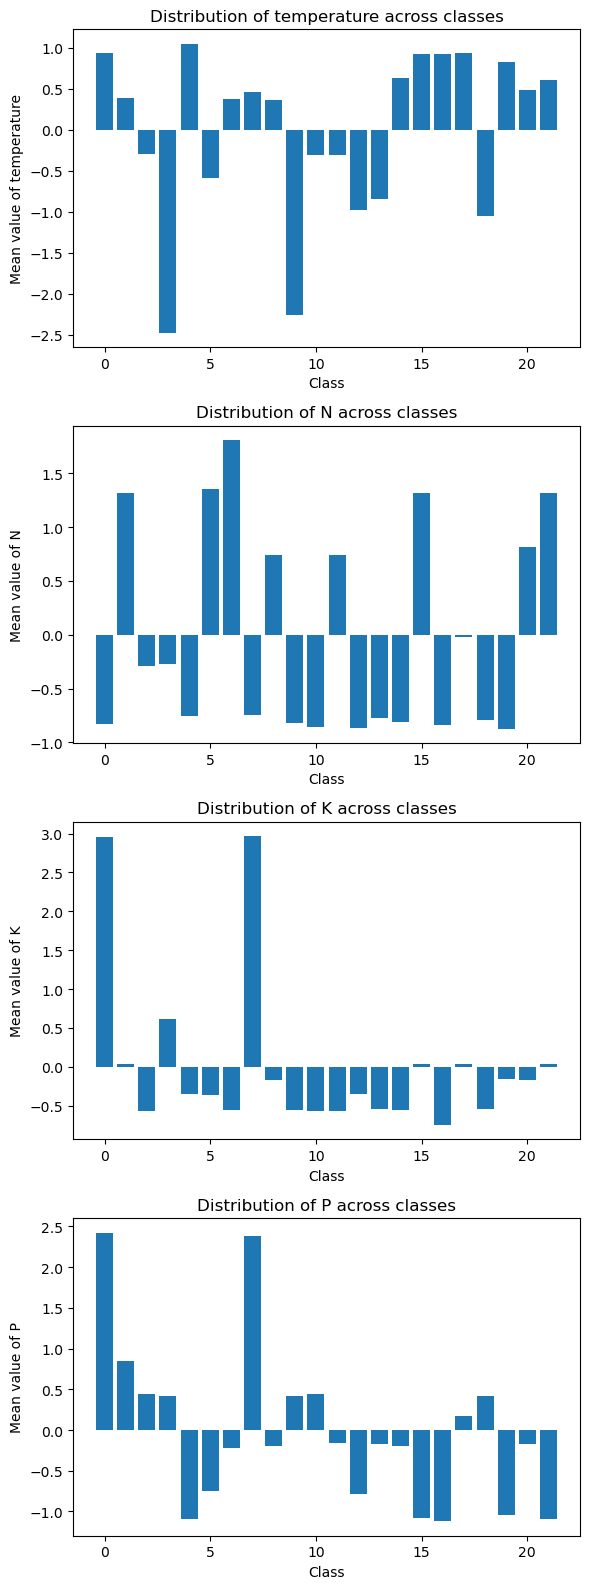

In [302]:

means = nb_model.theta_
top_feature_indices = np.argsort(np.mean(means, axis=0))[-4:]

top_feature_names = np.array(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])[top_feature_indices]
num_classes = means.shape[0]

fig, axes = plt.subplots(len(top_feature_names), 1, figsize=(6, 4 * len(top_feature_names)))

for i, feature_idx in enumerate(top_feature_indices):
    feature_name = top_feature_names[i]
    feature_values = means[:, feature_idx]

    axes[i].bar(np.arange(num_classes), feature_values, align='center')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(f'Mean value of {feature_name}')
    axes[i].set_title(f'Distribution of {feature_name} across classes')

plt.tight_layout()
plt.show()


In [303]:
unique_labels = df['label'].unique()
unique_labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)